## Library Imports

In [14]:
library(tidyverse)
library(kernlab)
library(glue)
library(kknn)

### Question 2.1

Describe a situation or problem from your job, everyday life, current events, etc., for which a
classification model would be appropriate. List some (up to 5) predictors that you might use.

**ANSWER:**

After a bit of thinking, I came to the conclusion that most of my life can fit a binary classification model. For example, a common situation that occurs day-to-day is my decision to either snooze my alarm or not snooze my alarm. Five predictors that determine the outcome of this event are:

1. How many hours did I sleep last night?
2. Is it the weekend or a weekday?
3. Do I have a meeting I cannot be late for?
4. Did I go out drinking last night?
5. Was yesterday an especially tiring day?

### Question 2.2

The files credit_card_data.txt (without headers) and credit_card_data-headers.txt
(with headers) contain a dataset with 654 data points, 6 continuous and 4 binary predictor variables. It
has anonymized credit card applications with a binary response variable (last column) indicating if the
application was positive or negative. The dataset is the “Credit Approval Data Set” from the UCI Machine
Learning Repository (https://archive.ics.uci.edu/ml/datasets/Credit+Approval) without the categorical
variables and without data points that have missing values.

In [2]:
cc_data <- read.delim("../data/2.2credit_card_data-headersSummer2018.txt")

X <- select(cc_data, -R1)
y <- select(cc_data, R1)

In [3]:
# Check for null values
for (col in colnames(cc_data)) {
    num_nulls  <- sum(is.na(cc_data$R1))
    print(glue("{col} has {num_nulls} nulls"))
    }

A1 has 0 nulls
A2 has 0 nulls
A3 has 0 nulls
A8 has 0 nulls
A9 has 0 nulls
A10 has 0 nulls
A11 has 0 nulls
A12 has 0 nulls
A14 has 0 nulls
A15 has 0 nulls
R1 has 0 nulls


#### 1. Using the support vector machine function ksvm contained in the R package kernlab, find a good classifier for this data. Show the equation of your classifier, and how well it classifies the data points in the full data set. (Don’t worry about test/validation data yet; we’ll cover that topic soon.)

In [4]:
svm <- ksvm(x=as.matrix(X), y=y, scaled=TRUE, type="C-svc", kernel="tanhdot", C=100)

 Setting default kernel parameters  


In [5]:
a <- colSums(svm@xmatrix[[1]] * svm@coef[[1]])
print(a)

         A1          A2          A3          A8          A9         A10 
 1609.69254  -606.89291   -74.03735   869.13373  3916.09987     0.00000 
        A11         A12         A14         A15 
 2096.27745 -1092.97383   269.42655  1836.96432 


In [6]:
a0 <- svm@b
print(glue("a0 is {a0}"))

a0 is -80.0872690537478


In [7]:
pred <- predict(svm, X)

acc <- round(sum(pred == y) / nrow(X) * 100, digits=3)
print(glue("The SVM Model was correct {acc}% of the time"))

The SVM Model was correct 72.171% of the time


In [8]:
### UDF for getting accuracy of SVM model
get_svm_metadata <- function(X, y, model) {
    coefs <- colSums(model@xmatrix[[1]] * model@coef[[1]])
    a0 <- model@b
    predictions <- predict(model, X)
    accuracy <- round(sum(predictions == y) / nrow(X) * 100, digits=3)
    
#     print(coefs)
#     print(glue("a0 is {a0}"))
    print(glue("The SVM Model was correct {accuracy}% of the time"))
    return(list(coefs=coefs, a0=a0, pred=predictions, acc=accuracy))
}

In [9]:
### TRY THIS FOR OTHER VALUES OF C
c_list <- c(0.001, 0.01, 0.1, 1, 10, 100, 1000)

for (c in c_list) {
    temp_model <- ksvm(x=as.matrix(X), y=y, scaled=TRUE, type="C-svc", kernel="vanilladot", C=c)
    print(glue("C value is {c}"))
    metadata_list <- get_svm_metadata(X, y, temp_model)
}

 Setting default kernel parameters  
C value is 0.001
The SVM Model was correct 83.792% of the time
 Setting default kernel parameters  
C value is 0.01
The SVM Model was correct 86.391% of the time
 Setting default kernel parameters  
C value is 0.1
The SVM Model was correct 86.391% of the time
 Setting default kernel parameters  
C value is 1
The SVM Model was correct 86.391% of the time
 Setting default kernel parameters  
C value is 10
The SVM Model was correct 86.391% of the time
 Setting default kernel parameters  
C value is 100
The SVM Model was correct 86.391% of the time
 Setting default kernel parameters  
C value is 1000
The SVM Model was correct 86.239% of the time


Based on the linear kernel it seems that the SVM model with a C value of 0.01, 0.1, 1, or 10 would provide the best results.

#### 2. You are welcome, but not required, to try other (nonlinear) kernels as well; we’re not covering them in this course, but they can sometimes be useful and might provide better predictions than vanilladot.

In [10]:
### Radial Basis Kernel
c_list <- c(0.001, 0.01, 0.1, 1, 10, 100, 1000)

for (c in c_list) {
    temp_model <- ksvm(x=as.matrix(X), y=y, scaled=TRUE, type="C-svc", kernel="rbfdot", C=c)
    print(glue("C value is {c}"))
    metadata_list <- get_svm_metadata(X, y, temp_model)
}

C value is 0.001
The SVM Model was correct 54.74% of the time
C value is 0.01
The SVM Model was correct 56.269% of the time
C value is 0.1
The SVM Model was correct 85.933% of the time
C value is 1
The SVM Model was correct 87.156% of the time
C value is 10
The SVM Model was correct 90.826% of the time
C value is 100
The SVM Model was correct 95.413% of the time
C value is 1000
The SVM Model was correct 98.165% of the time


For the RBF kernel, the model with a C value of 1000 provided the best results.

In [11]:
### Polynomial kernel
c_list <- c(0.001, 0.01, 0.1, 1, 10, 100, 1000)

for (c in c_list) {
    temp_model <- ksvm(x=as.matrix(X), y=y, scaled=TRUE, type="C-svc", kernel="polydot", C=c)
    print(glue("C value is {c}"))
    metadata_list <- get_svm_metadata(X, y, temp_model)
}

 Setting default kernel parameters  
C value is 0.001
The SVM Model was correct 83.792% of the time
 Setting default kernel parameters  
C value is 0.01
The SVM Model was correct 86.391% of the time
 Setting default kernel parameters  
C value is 0.1
The SVM Model was correct 86.391% of the time
 Setting default kernel parameters  
C value is 1
The SVM Model was correct 86.391% of the time
 Setting default kernel parameters  
C value is 10
The SVM Model was correct 86.391% of the time
 Setting default kernel parameters  
C value is 100
The SVM Model was correct 86.391% of the time
 Setting default kernel parameters  
C value is 1000
The SVM Model was correct 86.239% of the time


For the polynomial kernel, the results are similar to the linear kernel where the best model is the one with a C value of 0.01, 0.1, 1, 10, or 100.

#### 3. Using the k-nearest-neighbors classification function kknn contained in the R kknn package, suggest a good value of k, and show how well it classifies that data points in the full data set. Don’t forget to scale the data (scale=TRUE in kknn).

In [40]:
fit <- train.kknn(formula=R1~., data=cc_data, kmax=100, distance=2, kernel="optimal", scale=TRUE)
fit


Call:
train.kknn(formula = R1 ~ ., data = cc_data, kmax = 100, distance = 2,     kernel = "optimal", scale = TRUE)

Type of response variable: continuous
minimal mean absolute error: 0.1850153
Minimal mean squared error: 0.1073792
Best kernel: optimal
Best k: 58

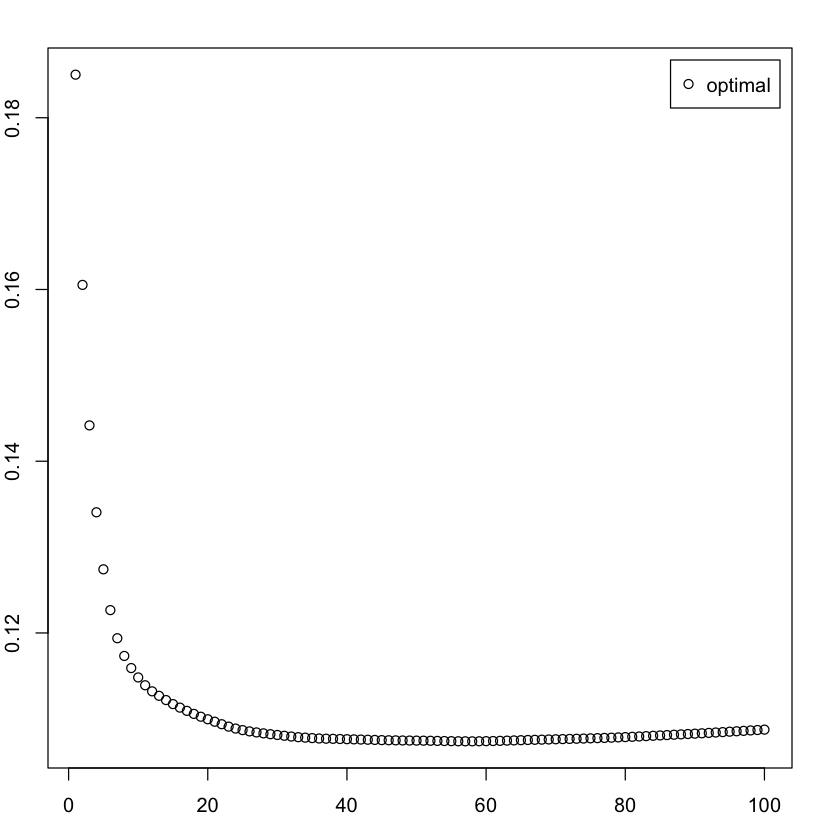

In [53]:
par(mfrow=c(1,1), mar=c(3,2,2,2)) 
plot(fit)

In [39]:
pred <- predict(fit, cc_data)
pred_bin <- round(pred)
pred_accuracy <- table(pred_bin, cc_data$R1)

In [43]:
pred_accuracy

        
pred_bin   0   1
       0 325  47
       1  33 249

The model accurately predicts 325 negative applications correctly and 249 positive applications correctly.

In [51]:
accuracy <- round(sum(pred_bin == cc_data$R1) / nrow(cc_data) * 100, digits=3)
print(glue("Model accuracy is {accuracy}%"))

Model accuracy is 87.768%


### Question 3.1

Using the same data set (credit_card_data.txt or credit_card_data-headers.txt) as
in Question 2.2, use the ksvm or kknn function to find a good classifier:

**(a) using cross-validation (do this for the k-nearest-neighbors model; SVM is optional); and**

In [92]:
# Shuffle data
shuffled_df <- cc_data[sample(nrow(cc_data)), ]

# 5 fold split
folds <- cut(seq(1, nrow(cc_data)), breaks=5, labels=FALSE)

# For each fold, train and test on KNN algorithm
for (i in 1:5) {
    print(glue("Iteration #{i}"))
    test_indices <- which(folds==i, arr.ind=TRUE)
    test_data <- cc_data[test_indices, ]
    train_data <- cc_data[-test_indices, ]
    
    # ks=58 was chosen since that was the best k value given from running the KNN algorithm on the entire data set
    temp_fit <- train.kknn(formula=R1~., data=train_data, ks=58, distance=2, kernel="optimal", scale=TRUE)
#     print(temp_fit)
    
    # Perform prediction step on test data since model was fit using the training data
    temp_pred <- predict(temp_fit, test_data)
    temp_pred_bin <- round(temp_pred)
    temp_pred_accuracy <- table(temp_pred_bin, test_data$R1)
#     print(temp_pred_accuracy)
    
    temp_accuracy <- round(sum(temp_pred_bin == test_data$R1) / nrow(test_data) * 100, digits=3)
    print(glue("Model accuracy is {temp_accuracy}%"))
    
    # Calculating the mean 
}



Iteration #1
Model accuracy is 68.702%
Iteration #2
Model accuracy is 77.099%
Iteration #3
Model accuracy is 93.077%
Iteration #4
Model accuracy is 80.916%
Iteration #5
Model accuracy is 87.786%


**(b) splitting the data into training, validation, and test data sets (pick either KNN or SVM; the other is optional).**

In [80]:
spec <- c(train=0.5, test=0.25, validate=0.25)

# Breaking down this line of code below:
## seq(nrow(cc_data)) gets the row indices
## nrow(cc_data)*cumsum(c(0,spec)) gets the number of rows that belong to each set of data
## labels=names(spec) labels each row of data as either train, test, or validate
## The cut() function takes the row indices and splits the data into 3 groups
## The sample() function randomly shuffles the data
splits <- sample(cut(seq(nrow(cc_data)), nrow(cc_data)*cumsum(c(0,spec)), labels=names(spec)))

sets <- split(cc_data, splits)

# Confirm that the sizes of each set are correct
nrow_train <- nrow(sets$train)
perc_train <- round(nrow_train / nrow(cc_data)*100, digits=1)

nrow_validate <- nrow(sets$validate)
perc_validate <- round(nrow_validate / nrow(cc_data)*100, digits=1)

nrow_test <- nrow(sets$test)
perc_test <- round(nrow_test / nrow(cc_data)*100, digits=1)

print(glue("Number of rows for training set: {nrow_train} ({perc_train}%)"))
print(glue("Number of rows for validate set: {nrow_validate} ({perc_validate}%)"))
print(glue("Number of rows for test set: {nrow_test} ({perc_test}%)"))

Number of rows for training set: 327 (50%)
Number of rows for validate set: 164 (25.1%)
Number of rows for test set: 163 (24.9%)


In [94]:
for (i in seq(from=5, to=105, by=10)) {
    temp_fit <- train.kknn(formula=R1~., data=sets$train, ks=i, distance=2, kernel="optimal", scale=TRUE)
#     print(temp_fit)
    
    # Perform prediction step on test data since model was fit using the training data
    temp_pred <- predict(temp_fit, sets$validate)
    temp_pred_bin <- round(temp_pred)
    temp_pred_accuracy <- table(temp_pred_bin, sets$validate$R1)
#     print(temp_pred_accuracy)
    
    temp_accuracy <- round(sum(temp_pred_bin == sets$validate$R1) / nrow(sets$validate) * 100, digits=3)
    print(glue("Model accuracy is {temp_accuracy}% for k = {i}"))
}

Model accuracy is 81.707% for k = 5
Model accuracy is 81.707% for k = 15
Model accuracy is 81.098% for k = 25
Model accuracy is 82.927% for k = 35
Model accuracy is 82.927% for k = 45
Model accuracy is 83.537% for k = 55
Model accuracy is 84.146% for k = 65
Model accuracy is 84.146% for k = 75
Model accuracy is 82.927% for k = 85
Model accuracy is 82.927% for k = 95
Model accuracy is 82.927% for k = 105


**Best model is the one with k = 65 or 75 but I'll choose 65**

In [96]:
final_model <- train.kknn(formula=R1~., data=sets$train, ks=65, distance=2, kernel="optimal", scale=TRUE)
test_pred <- predict(final_model, sets$test)
test_pred_bin <- round(test_pred)
test_pred_accuracy <- table(test_pred_bin, sets$test$R1)

test_accuracy <- round(sum(test_pred_bin == sets$test$R1) / nrow(sets$test) * 100, digits=3)
print(glue("Final model accuracy is {test_accuracy}% for k = 65"))

Final model accuracy is 82.209% for k = 65
